In [1]:
import pickle 

x_train = pickle.load(open("x_train.obj","rb"))
x_test = pickle.load(open("x_test.obj","rb"))
y_train = pickle.load(open("y_train.obj","rb"))

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#### Supervised classification with traditional NN

In [5]:
y_train_bin = pd.get_dummies(y_train).values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train_bin, test_size = 0.3)

In [7]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((9800, 784), (9800, 11), (4200, 784), (4200, 11))

In [100]:
dims = x_train.shape[1]
nb_classes = y_train_bin.shape[1]

model_ = Sequential()
model_.add(Dense(256, input_shape=(dims,), activation = "relu"))
model_.add(Dropout(0.5))
model_.add(Dense(512, activation = "relu"))
model_.add(Dropout(0.5))
model_.add(Dense(256, activation = "relu"))
model_.add(Dropout(0.5))
model_.add(Dense(nb_classes, activation = 'softmax'))

model_.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 11)               

In [9]:
import keras.optimizers
from keras.callbacks import EarlyStopping
#from keras import optimizers

model_.compile(loss='categorical_crossentropy', optimizer='Adadelta', 
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

network_history = model_.fit(X_train, Y_train, batch_size=32, 
                            epochs=75, verbose=1, validation_data=(X_val, Y_val), callbacks=[es])

Train on 9800 samples, validate on 4200 samples
Epoch 1/75
9800/9800 [==============================] - 5s 536us/step - loss: 1.2413 - accuracy: 0.5866 - val_loss: 0.5961 - val_accuracy: 0.8093
Epoch 2/75
9800/9800 [==============================] - 5s 526us/step - loss: 0.7373 - accuracy: 0.7765 - val_loss: 0.4486 - val_accuracy: 0.8619
Epoch 3/75
9800/9800 [==============================] - 5s 486us/step - loss: 0.5855 - accuracy: 0.8244 - val_loss: 0.3962 - val_accuracy: 0.8788
Epoch 4/75
9800/9800 [==============================] - 5s 493us/step - loss: 0.4999 - accuracy: 0.8487 - val_loss: 0.3568 - val_accuracy: 0.8919
Epoch 5/75
9800/9800 [==============================] - 5s 501us/step - loss: 0.4559 - accuracy: 0.8615 - val_loss: 0.3342 - val_accuracy: 0.9005
Epoch 6/75
9800/9800 [==============================] - 5s 560us/step - loss: 0.4233 - accuracy: 0.8765 - val_loss: 0.3271 - val_accuracy: 0.9062
Epoch 7/75
9800/9800 [==============================] - 5s 491us/step - loss

In [10]:
from sklearn.metrics import classification_report
#metrics on validation set
y_pred_val = model_.predict_classes(X_val)
y_true_val = []
for i in range(len(Y_val)):
    y_true_val.append(np.argmax(Y_val[i]))
y_true_val=np.array(y_true_val)

target_names = ['P','Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(y_true_val, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

           P       0.94      0.95      0.94       370
           Q       0.96      0.90      0.93       358
           R       0.92      0.91      0.92       417
           S       0.96      0.98      0.97       385
           T       0.94      0.96      0.95       391
           U       0.91      0.92      0.92       382
           V       0.87      0.90      0.88       377
           W       0.97      0.94      0.96       397
           X       0.95      0.92      0.93       444
           Y       0.88      0.88      0.88       422
           Z       0.95      0.95      0.95       257

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



In [11]:
#metrics on training set
y_pred_train = model_.predict_classes(X_train)
y_true_train = []
for i in range(len(Y_train)):
    y_true_train.append(np.argmax(Y_train[i]))
y_true_train=np.array(y_true_train)

print(classification_report(y_true_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

           P       0.99      0.99      0.99       925
           Q       0.99      0.99      0.99       907
           R       0.98      0.99      0.99       929
           S       1.00      1.00      1.00       944
           T       0.99      0.99      0.99       945
           U       0.97      0.98      0.98       915
           V       0.98      0.97      0.97       892
           W       1.00      0.99      0.99       930
           X       0.99      0.99      0.99       878
           Y       0.98      0.98      0.98       899
           Z       0.99      0.99      0.99       636

    accuracy                           0.99      9800
   macro avg       0.99      0.99      0.99      9800
weighted avg       0.99      0.99      0.99      9800



In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true_train, y_pred_train), accuracy_score(y_true_val, y_pred_val)

(0.9879591836734694, 0.9292857142857143)

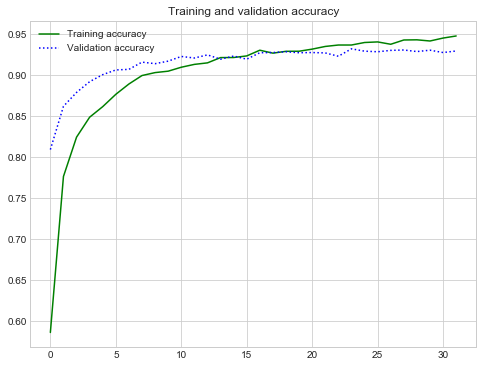

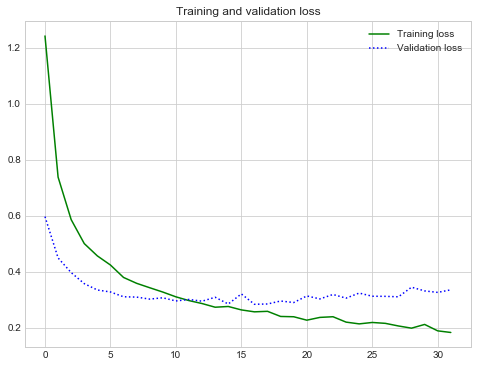

In [97]:
import matplotlib.pyplot as plt


epoch = network_history.epoch

plt.style.use('seaborn-whitegrid')
loss = network_history.history['accuracy']
val_loss = network_history.history['val_accuracy']
 
plt.figure(figsize=(8,6))
plt.plot(epoch, loss, 'g', label='Training accuracy')
plt.plot(epoch, val_loss, 'b:', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.style.use('seaborn-whitegrid')
loss = network_history.history['loss']
val_loss = network_history.history['val_loss']
 
plt.figure(figsize=(8,6))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Autoencoder - Model 1

In [54]:
# this is the size of our encoded representations
encoding_dim = 128 

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden_1 = Dense(512, activation='relu')(input_img)
hidden_2 = Dense(256, activation='relu')(hidden_1)
code = Dense(encoding_dim, activation='relu')(hidden_2)

# "decoded" is the lossy reconstruction of the input
hidden_3 = Dense(256, activation='relu')(code)
hidden_4 = Dense(512, activation='relu')(hidden_3)
decoded = Dense(784, activation='sigmoid')(hidden_4)

# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [55]:
#autoencoder.compile(optimizer='Adamax', loss='mse')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_52 (Dense)             (None, 784)               402

In [56]:
#note: x_train, x_train :) 

es_ = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
autoencoder_train = autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=64,
                   # shuffle=True,
                    validation_data=(x_test, x_test), callbacks=[es_])

Train on 14000 samples, validate on 8800 samples
Epoch 1/50
14000/14000 [==============================] - 4s 296us/step - loss: 0.2681 - val_loss: 0.1891
Epoch 2/50
14000/14000 [==============================] - 4s 282us/step - loss: 0.1725 - val_loss: 0.1630
Epoch 3/50
14000/14000 [==============================] - 4s 281us/step - loss: 0.1552 - val_loss: 0.1519
Epoch 4/50
14000/14000 [==============================] - 4s 283us/step - loss: 0.1468 - val_loss: 0.1458
Epoch 5/50
14000/14000 [==============================] - 5s 324us/step - loss: 0.1418 - val_loss: 0.1420
Epoch 6/50
14000/14000 [==============================] - 5s 329us/step - loss: 0.1385 - val_loss: 0.1405
Epoch 7/50
14000/14000 [==============================] - 5s 328us/step - loss: 0.1358 - val_loss: 0.1380
Epoch 8/50
14000/14000 [==============================] - 5s 338us/step - loss: 0.1338 - val_loss: 0.1353
Epoch 9/50
14000/14000 [==============================] - 5s 332us/step - loss: 0.1321 - val_loss: 0.13

In [57]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

#ENCODER
encoder_layer1 = autoencoder.layers[1]
encoder_layer2 = autoencoder.layers[2]
encoder_layer3 = autoencoder.layers[3]

encoder=Model(input=input_img, 
                output=encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

#DECODER
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

# create the decoder model
decoder = Model(input=encoded_input, 
                output=decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [58]:
from matplotlib import pyplot as plt

%matplotlib inline

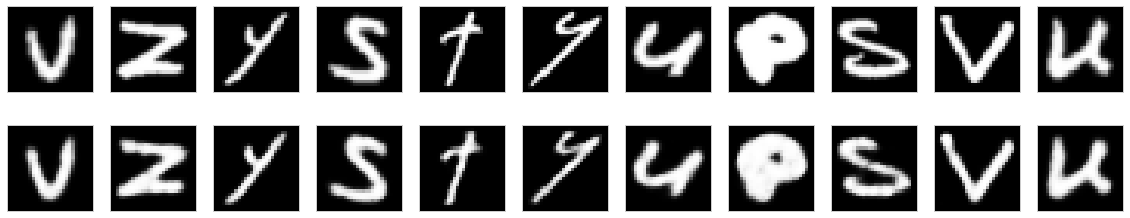

In [59]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 11 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

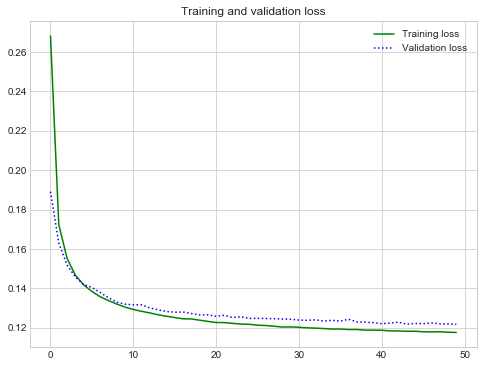

In [60]:
epoch = autoencoder_train.epoch

plt.style.use('seaborn-whitegrid')
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
 
plt.figure(figsize=(8,6))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
 

#### Denoising autoencoder

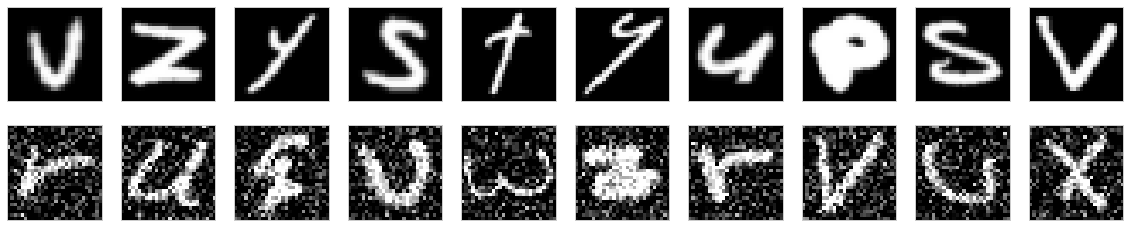

In [101]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

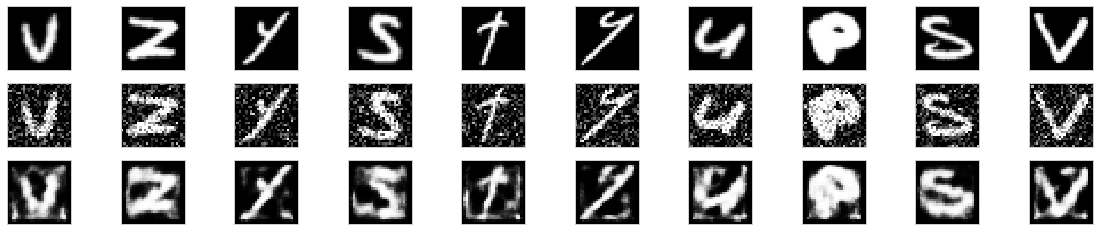

In [86]:
#MODELLO 1
encoded_imgs_noisy = encoder.predict(x_test_noisy)
decoded_imgs_noisy = decoder.predict(encoded_imgs_noisy)

n = 10 
plt.figure(figsize=(20, 4))

for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#### Classification with autoencoder

In [87]:
from keras.regularizers import l2

def build_classification_model(encoding_dim):
    
    model=Sequential()
    model.add(Dense(512,input_shape=(784,),activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(encoding_dim,activation='relu'))
  #  model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
 #   model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
 #   model.add(Dropout(0.5))
    model.add(Dense(11,activation='softmax'))
    
    return model

In [88]:
model_ae = build_classification_model(128)

In [89]:
for i in range(0,3):
    model_ae.layers[i].set_weights(autoencoder.layers[i+1].get_weights())
    
for layer in model_ae.layers[0:3]:
    layer.trainable = False

In [90]:
model_ae.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_60 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_61 (Dense)             (None, 11)                2827      
Total params: 601,995
Trainable params: 35,851
Non-trainable params: 566,144
_________________________________________________________________


In [91]:
model_ae.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

network_history_ae = model_ae.fit(X_train, Y_train, validation_data = (X_val,Y_val), 
                                  batch_size = 32, epochs = 50, callbacks=[es])

Train on 9800 samples, validate on 4200 samples
Epoch 1/50
9800/9800 [==============================] - 1s 91us/step - loss: 2.0818 - accuracy: 0.6530 - val_loss: 1.5215 - val_accuracy: 0.7445
Epoch 2/50
9800/9800 [==============================] - 1s 87us/step - loss: 1.3026 - accuracy: 0.7832 - val_loss: 1.2293 - val_accuracy: 0.7717
Epoch 3/50
9800/9800 [==============================] - 1s 86us/step - loss: 1.0705 - accuracy: 0.8077 - val_loss: 0.9917 - val_accuracy: 0.8276
Epoch 4/50
9800/9800 [==============================] - 1s 80us/step - loss: 0.9042 - accuracy: 0.8344 - val_loss: 0.8791 - val_accuracy: 0.8300
Epoch 5/50
9800/9800 [==============================] - 1s 80us/step - loss: 0.8002 - accuracy: 0.8478 - val_loss: 0.7894 - val_accuracy: 0.8479
Epoch 6/50
9800/9800 [==============================] - 1s 82us/step - loss: 0.7189 - accuracy: 0.8602 - val_loss: 0.6979 - val_accuracy: 0.8686
Epoch 7/50
9800/9800 [==============================] - 1s 80us/step - loss: 0.662

In [93]:
from sklearn.metrics import classification_report
#metrics on validation set
y_pred_val_ae = model_ae.predict_classes(X_val)
y_true_val_ae = []
for i in range(len(Y_val)):
    y_true_val_ae.append(np.argmax(Y_val[i]))
y_true_val_ae = np.array(y_true_val_ae)

target_names = ['P','Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(classification_report(y_true_val_ae, y_pred_val_ae, target_names=target_names))

              precision    recall  f1-score   support

           P       0.88      0.96      0.92       370
           Q       0.93      0.86      0.89       358
           R       0.81      0.96      0.88       417
           S       0.97      0.97      0.97       385
           T       0.97      0.94      0.95       391
           U       0.93      0.89      0.91       382
           V       0.89      0.85      0.87       377
           W       0.96      0.95      0.95       397
           X       0.93      0.92      0.93       444
           Y       0.93      0.83      0.87       422
           Z       0.93      0.95      0.94       257

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



In [94]:
#metrics on training set
y_pred_train_ae = model_ae.predict_classes(X_train)
y_true_train_ae = []
for i in range(len(Y_train)):
    y_true_train_ae.append(np.argmax(Y_train[i]))
y_true_train_ae = np.array(y_true_train_ae)

print(classification_report(y_true_train_ae, y_pred_train_ae, target_names=target_names))

              precision    recall  f1-score   support

           P       0.91      0.97      0.94       925
           Q       0.96      0.90      0.93       907
           R       0.86      0.98      0.92       929
           S       0.98      0.99      0.99       944
           T       0.98      0.96      0.97       945
           U       0.96      0.93      0.94       915
           V       0.94      0.90      0.92       892
           W       0.97      0.98      0.98       930
           X       0.95      0.96      0.96       878
           Y       0.97      0.88      0.92       899
           Z       0.98      0.97      0.98       636

    accuracy                           0.95      9800
   macro avg       0.95      0.95      0.95      9800
weighted avg       0.95      0.95      0.95      9800



In [95]:
accuracy_score(y_true_train_ae, y_pred_train_ae), accuracy_score(y_true_val_ae, y_pred_val_ae)

(0.9476530612244898, 0.9157142857142857)

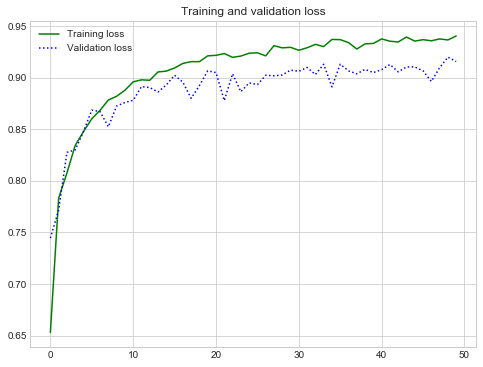

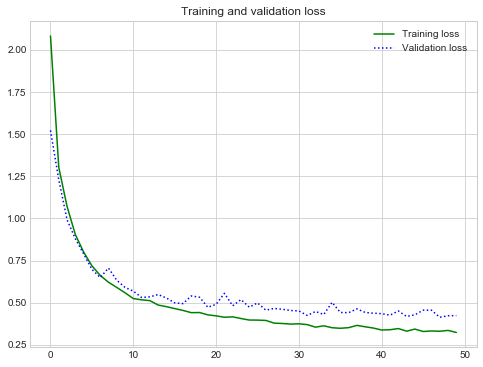

In [96]:
epoch = network_history_ae.epoch

plt.style.use('seaborn-whitegrid')
loss = network_history_ae.history['accuracy']
val_loss = network_history_ae.history['val_accuracy']
 
plt.figure(figsize=(8,6))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.style.use('seaborn-whitegrid')
loss = network_history_ae.history['loss']
val_loss = network_history_ae.history['val_loss']
 
plt.figure(figsize=(8,6))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [103]:
Y_test = model_ae.predict_classes(x_test)

Y_df_test = pd.DataFrame(Y_test, columns=['TARGET'])

In [104]:
Y_df_test.TARGET.value_counts()

2     954
0     858
7     816
8     814
10    805
3     802
4     785
5     756
9     743
6     737
1     730
Name: TARGET, dtype: int64

In [108]:
out_file = open("Federico_Signoretta_847343_score2.txt","w")
for i in Y_test:
    n = str(i+16) + "\n"
    out_file.write(n)
out_file.close()